In [3]:
import numpy as np  # 数据结构
import pandas as pd
import sklearn.cluster as skc  # 密度聚类
from sklearn import metrics   # 评估模型
import matplotlib.pyplot as plt

In [36]:
ShotPosition_df=pd.read_csv('ShotPosition.csv')
var = ['loc_x','loc_y']
var2= ['shot_made_flag']
shotPos=ShotPosition_df[var]
shotMade=ShotPosition_df[var2]
X=np.array(shotPos)
Y=np.array(shotMade)
print(X)
print(len(X))

[[  99  249]
 [-122  145]
 [ -60  129]
 ...
 [-217  149]
 [  59   49]
 [-226  104]]
13958


每个样本的簇标号:
[ 0  1 -1 ...  0 -1  0]
噪声比: 24.71%
[2245  141 1930  213  201  293   63   18   16]
[5234  305 3329  439  409  592  127   44   30]
[[   3.96675583  216.72544899]
 [-114.38688525  145.91803279]
 [   2.00240312   20.92370081]
 [ 116.51708428  147.40546697]
 [ 231.62836186   23.55501222]
 [-230.71114865   16.57939189]
 [   1.83464567  159.96850394]
 [  95.34090909   32.02272727]
 [ 229.33333333   86.16666667]]
分簇的数目: 9
轮廓系数: -0.081
簇  0 的所有样本:
[[  99  249]
 [ 152  195]
 [ -76  250]
 ...
 [  91  246]
 [-217  149]
 [-226  104]]
簇  1 的所有样本:
[[-122  145]
 [-125  134]
 [-120  146]
 [-123  145]
 [-111  137]
 [-106  124]
 [-103  132]
 [-112  167]
 [-125  126]
 [-108  132]
 [-122  137]
 [ -95  160]
 [-136  124]
 [-140  139]
 [ -93  176]
 [ -92  179]
 [-127  118]
 [-125  126]
 [ -93  176]
 [-101  172]
 [-119  126]
 [-128  137]
 [-119  127]
 [-127  145]
 [-119  129]
 [-106  170]
 [-114  124]
 [-122  149]
 [-119  140]
 [-141  119]
 [ -95  168]
 [ -92  175]
 [-125  154]
 [ -95  143]
 [-128  

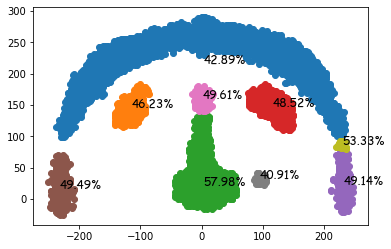

[0.42892625 0.46229508 0.57975368 0.48519362 0.49144254 0.49493243
 0.49606299 0.40909091 0.53333333]


In [71]:
db = skc.DBSCAN(eps=10, min_samples=38).fit(X) #DBSCAN聚类方法 还有参数，matric = ""距离计算方法
labels = db.labels_  #和X同一个维度，labels对应索引序号的值 为她所在簇的序号。若簇编号为-1，表示为噪声

print('每个样本的簇标号:')
print(labels)

raito = len(labels[labels[:] == -1]) / len(labels)  #计算噪声点个数占总数的比例
print('噪声比:', format(raito, '.2%'))

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)  # 获取分簇的数目

total=np.zeros(n_clusters_, dtype = int, order = 'C')
goal=np.zeros(n_clusters_, dtype = int, order = 'C')
rate=np.zeros(n_clusters_, dtype = float, order = 'C')
Pos=np.zeros([n_clusters_,2], dtype = float, order = 'C')
for i in range(len(X)):
    if labels[i]>=0:
        total[labels[i]]=total[labels[i]]+1
        Pos[labels[i],0]=Pos[labels[i],0]+X[i,0]
        Pos[labels[i],1]=Pos[labels[i],1]+X[i,1]
        if Y[i]==1:
            goal[labels[i]]=goal[labels[i]]+1
rate=goal/total
Pos[:,0]=Pos[:,0]/total
Pos[:,1]=Pos[:,1]/total
print(goal)
print(total)
print(Pos)
        

print('分簇的数目: %d' % n_clusters_)
print("轮廓系数: %0.3f" % metrics.silhouette_score(X, labels)) #轮廓系数评价聚类的好坏

for i in range(n_clusters_):
    print('簇 ', i, '的所有样本:')
    one_cluster = X[labels == i]
    print(one_cluster)
    plt.plot(one_cluster[:,0],one_cluster[:,1],'o')
#     plt.annotate(text='Here I am',xy=(3,np.sin(3)),xytext=(4,-0.5),weight='bold',color='aqua',arrowprops=dict(arrowstyle='-|>',connectionstyle='arc3',color='red'),bbox=dict(boxstyle='round,pad=0.5', fc='yellow', ec='k',lw=1 ,alpha=0.4))
    plt.text(Pos[i,0], Pos[i,1], format(rate[i], '.2%'), family='fantasy', fontsize=12, 
            style='italic',color='black')

plt.show()
print(rate)
